# Project Flying Squirrel: Investigating the Factors That Affect Job Change Rate

## BUDT 704 Group 21 

###  Atharva Patil, Javan Reuto, Parth Kodnani, Snigdha Madiraju, Sumeet Ram, Yingsheng Lin

### Project Overview: 

The dataset that we chose to analyze is called “HR Analytics: Job Change of Data Scientists” and was retrieved from: https://www.kaggle.com/uniabhi/hr-analytics-job-change-of-data-scientists. 

This dataset is centered around the fact that a company, who is interested in Big Data Analytics, wants to conduct training and provide relevant courses to equip their future employees. However, due to high costs and the large amount of time these trainings require, the company is further interested in identifying the real retention rate of these employees. 

The dataset covers different factors (characterized by the different columns) that may affect a person’s decision to leave their current job. Using this information, the company is interested in looking at how those factors might translate to an employee leaving the company and how it can improve the training programs to increase employee retention rate. 

This analysis is especially relevant to us, those in our age group, and those who are looking to enter the workforce. It not only helps us understand what factors affect an employee’s decision to leave a company, but also allows us to be better prepared for the future when we potentially face such circumstances. This dataset can be applicable to anyone, regardless of what field/industry they come from, as the insights are universal. 

The questions we are looking to answer through this analysis are as follows: 

1.  How can the company predict the probability of employees wanting to work with companies by training models?

2.  What are the factors that affect an employee's decision to stay with/leaving a company?

Both of these questions are answered through modeling and data visualization, emphasizing our utilization of thorough data analysis to bring recommendations to the company of interest.

### Data Analysis vs. Data Processing

The dataset was based on a target for job retention for employees looking to either stay in their current job or move to a different job. The main data processing task that required beyond basic processing was the encoding of categorical variables for models that were performed in our analysis. For this reason, we chose to focus heavily on data analysis. 

The visualization was focused on the variables that potentially contributed to an employee either looking for a job change or not. Examples of such visualization include: a scatterplot for city development index, correlation of features, and bar plots covering multiple categories. The analysis that goes beyond basic analysis include Decision Tree, Random Forest, LGBM, Logistic Regression, and KNN models. These models serve the purpose of predicting the column variable "Target”, which represents whether an employee is looking for a job change or not. This goes beyond basic visualization because it incorporates machine learning algorithms that allow us to build a prediction on a "test" data set. The prediction itself is based on the accuracy of the model created, with the prediction serving as the "Target" column. 

### Data Processing: 
Data Processing is "the collection and manipulation of items of data to produce meaningful information". The given dataset is very imbalanced and most features are categorical (Nominal, Ordinal, Binary), some with high cardinality. 

In order to successfully analyze the data, we first needed to process the data to prepare it for analysis. The following tasks were performed to clean/transform the dataset:


* Bin City Development Index

* Drop duplicate values for Experience and Relevant Experience 

* Fill NaN values with “other” for Experience and Relevant Experience
 
* Create crosstabs for Experience and Relevant Experience
 
* Sort number of candidates who change jobs by descending order
 
* Bin Experience 
 
* Impute null values with “NA” for Enrolled University & Education Level 
 
* Drop duplicate values for Gender & Major Discipline Columns
 
* Fill NaN values with “other” for Gender & Major Discipline Columns
 
* Create crosstabs for Gender & Major Discipline Columns
 
* Replace null values with “not known” for Company Size & Company Type 
 
* Find frequency of each category in Company Type 
 
* Adjust “never” to “0” for Last New Job & Training Hours
 
* Bin Training Hours


#### Import Libraries: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
from sklearn.neighbors import KNeighborsClassifier


#### 1. City & City Development Index Columns

Read file from csv

In [2]:
aug_traindf=pd.read_csv(r"C:\Users\linyi\Desktop\aug_train.csv")

Binning of the City Development Index

In [3]:
bins_city_development_index = np.linspace(start=0.000, stop=1.0, num=11) # specifies the number of bins to be 10 with 1 being the max city development index value
aug_traindf['city_development_index_bins'] = pd.cut(aug_traindf['city_development_index'],bins_city_development_index) 
bin_count = aug_traindf['city_development_index_bins'].value_counts().sort_index() # sorts the bins from beginning to end to represent the frequency within each bin


City Development Index Bin Variable Creation

In [4]:
bins1 = bin_count.index.tolist() # variable of bin categories created as a list for use in barplot visualizations
bin_count_list = (list(bin_count)) # variable of bin frequency created as a list for use in barplot visualizations

#### 2. Relevant Experience & Experience Columns

Read the file from csv

In [5]:
df=pd.read_csv(r"C:\Users\linyi\Desktop\aug_train.csv") # path needs to be changed when file path changed
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


Adjust duplicate and null values 

In [6]:
df.drop_duplicates(keep = False) #drop all the columns that have duplicated values

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [7]:
df.isnull().sum(axis=0) # sum the null values of all columns

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
df1=df.fillna('Other') # fill the nan values with 'Other'
df1

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Other,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,Other,Other,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,Other,Graduate,Business Degree,<1,Other,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Other,Other,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Other,Other,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Other,<1,500-999,Pvt Ltd,2,97,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Other,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,Other,Other,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,Other,Graduate,Business Degree,<1,Other,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Other,Other,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Other,Other,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Other,<1,500-999,Pvt Ltd,2,97,0.0


Find the unique elements in columns

In [9]:
relevantexperiencetype=df1['relevent_experience'].unique() # find the unique elements in the column of 'relevent_experience'
relevantexperiencetype

array(['Has relevent experience', 'No relevent experience'], dtype=object)

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [10]:
experiencetype=df1['experience'].unique() # find the unique elements in the column of 'relevent_experience'
experiencetype

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 'Other'],
      dtype=object)

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 'Other'],
      dtype=object)

Draw frequency table of relevent experience by crosstab

In [11]:
releventexperiencefreq=pd.crosstab(index=df1['relevent_experience'], columns='count')# use crosstab to count the elements in 'relevent_experience' column
releventexperiencefreq

col_0,count
relevent_experience,
Has relevent experience,13792
No relevent experience,5366


col_0,count
relevent_experience,
Has relevent experience,13792
No relevent experience,5366


Draw bar plots of relevent_experience column

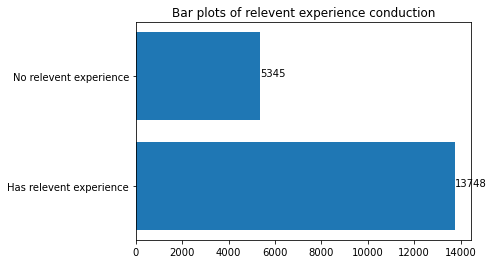

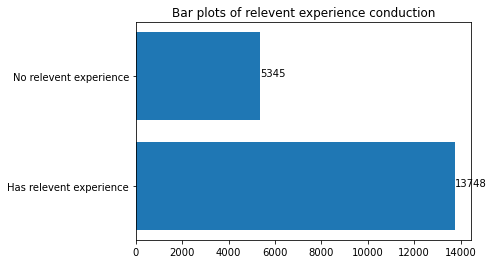

In [12]:
object=('Has relevent experience','No relevent experience') # name of the columns
value=[13748,5345] #number of values
width=0.5
plt.barh(object,value) # plot bar graph
for index, num in enumerate(value):  # add number labels to the bar plot
    plt.text(num, index,str(num))
plt.title("Bar plots of relevent experience conduction")
plt.show()

Create frequency table by using crosstab

In [13]:
experiencefreq=pd.crosstab(index=df1['experience'], columns='count') # use crosstab to count the elements in 'experience' column
experiencefreq

col_0,count
experience,
1,549
10,985
11,664
12,494
13,399
14,586
15,686
16,508
17,342


col_0,count
experience,
1,549
10,985
11,664
12,494
13,399
14,586
15,686
16,508
17,342


Create bins for the 'experience' column, 

Replace categories '<1' , '>20' with numeric values to process bin count

In [14]:
df2=df1['experience'].replace('<1',0) # replace <1 with 0 as bins are for numeric values
df2

0        >20
1         15
2          5
3          0
4        >20
        ... 
19153     14
19154     14
19155    >20
19156      0
19157      2
Name: experience, Length: 19158, dtype: object

0        >20
1         15
2          5
3          0
4        >20
        ... 
19153     14
19154     14
19155    >20
19156      0
19157      2
Name: experience, Length: 19158, dtype: object

In [15]:
df2=df2.replace('>20',float('inf')) # replace >20 with inf as bins are for numeric values
df2

0        inf
1         15
2          5
3          0
4        inf
        ... 
19153     14
19154     14
19155    inf
19156      0
19157      2
Name: experience, Length: 19158, dtype: object

0        inf
1         15
2          5
3          0
4        inf
        ... 
19153     14
19154     14
19155    inf
19156      0
19157      2
Name: experience, Length: 19158, dtype: object

In [16]:
df2.drop(df2.index[df2 == 'Other'], inplace = True)#drop "Other' to conduct bins. 'other' are the nan values
df2=pd.to_numeric(df2)# change df2 to numeric to process 

In [17]:
bins = [float('-inf'),0,3,6,9,12,15,18,float('inf') ]
classify = pd.cut(df2,bins) # cut df2 based on the bins
df3=pd.value_counts(classify).sort_index() # count the values and sort the index by ascending order
df3

(-inf, 0.0]      522
(0.0, 3.0]      3030
(3.0, 6.0]      4049
(6.0, 9.0]      2810
(9.0, 12.0]     2143
(12.0, 15.0]    1671
(15.0, 18.0]    1130
(18.0, inf]     3738
Name: experience, dtype: int64

(-inf, 0.0]      522
(0.0, 3.0]      3030
(3.0, 6.0]      4049
(6.0, 9.0]      2810
(9.0, 12.0]     2143
(12.0, 15.0]    1671
(15.0, 18.0]    1130
(18.0, inf]     3738
Name: experience, dtype: int64

Create frequency tables by using crosstab

In [18]:
table=pd.crosstab(df1.relevent_experience, df1.target) # use crosstab to count the elements in 'relevent_experience' column
table

target,0.0,1.0
relevent_experience,,
Has relevent experience,10831,2961
No relevent experience,3550,1816


target,0.0,1.0
relevent_experience,,
Has relevent experience,10831,2961
No relevent experience,3550,1816


Use crosstab to calculate the frequency of the elements in column 'experience' and column 'target', sort the number of candidates who change jobs in descending order

In [19]:
table1=pd.crosstab(df1.experience, df1.target) # use crosstab to count the elements in 'experience' column and 'target' column
table1=table1.sort_values(by=[1.0],ascending=False) # sort the value in descending order
table1

target,0.0,1.0
experience,,
>20,2783,503
3,876,478
4,946,457
5,1018,412
2,753,374
6,873,343
7,725,303
<1,285,237
1,316,233


target,0.0,1.0
experience,,
>20,2783,503
3,876,478
4,946,457
5,1018,412
2,753,374
6,873,343
7,725,303
<1,285,237
1,316,233


#### 3. Enrolled University & Education Level Columns

Description of Data

In [20]:
# describing the data to see its characteristics
print(f'Rows, Columns of DataFrame: {df.shape}')
print(f'Total values of DataFrame: {df.size}')
print(f'Rows of DataFrame: {len(df)}')
print(f'Columns of DataFrame: {len(df.columns)}')

Rows, Columns of DataFrame: (19158, 14)
Total values of DataFrame: 268212
Rows of DataFrame: 19158
Columns of DataFrame: 14
Rows, Columns of DataFrame: (19158, 14)
Total values of DataFrame: 268212
Rows of DataFrame: 19158
Columns of DataFrame: 14


Data Cleaning


We see quite a lot of null values. Most of them are present in the categorical variable columns. Hence, we replace them with the most common observation; the mode.

In [21]:
print(df.columns)

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')
Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


In [22]:
df.isnull().sum() # find all the nan values in the data frame

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [23]:
dfEducation = df[['major_discipline', 'enrolled_university', 'education_level', 'target']] # get 4 columns out of the dataframe
dfEducation

,major_discipline,enrolled_university,education_level,target
0,STEM,no_enrollment,Graduate,1.0
1,STEM,no_enrollment,Graduate,0.0
2,STEM,Full time course,Graduate,0.0
3,Business Degree,NaN,Graduate,1.0
4,STEM,no_enrollment,Masters,0.0
...,...,...,...,...
19153,Humanities,no_enrollment,Graduate,1.0
19154,STEM,no_enrollment,Graduate,1.0
19155,STEM,no_enrollment,Graduate,0.0
19156,NaN,no_enrollment,High School,0.0


,major_discipline,enrolled_university,education_level,target
0,STEM,no_enrollment,Graduate,1.0
1,STEM,no_enrollment,Graduate,0.0
2,STEM,Full time course,Graduate,0.0
3,Business Degree,NaN,Graduate,1.0
4,STEM,no_enrollment,Masters,0.0
...,...,...,...,...
19153,Humanities,no_enrollment,Graduate,1.0
19154,STEM,no_enrollment,Graduate,1.0
19155,STEM,no_enrollment,Graduate,0.0
19156,NaN,no_enrollment,High School,0.0


In [24]:
null = dfEducation.isnull() # To recognize null values
nullAny = null.any(axis = 1) # To check for any null values
nullPrint = dfEducation[nullAny] # To put these null values in a dataframe
nullPrint

,major_discipline,enrolled_university,education_level,target
3,Business Degree,NaN,Graduate,1.0
6,NaN,no_enrollment,High School,0.0
10,NaN,Full time course,High School,1.0
13,NaN,NaN,NaN,0.0
14,NaN,Full time course,High School,0.0
...,...,...,...,...
19140,NaN,no_enrollment,Primary School,0.0
19142,NaN,no_enrollment,NaN,0.0
19151,NaN,Full time course,Graduate,0.0
19156,NaN,no_enrollment,High School,0.0


,major_discipline,enrolled_university,education_level,target
3,Business Degree,NaN,Graduate,1.0
6,NaN,no_enrollment,High School,0.0
10,NaN,Full time course,High School,1.0
13,NaN,NaN,NaN,0.0
14,NaN,Full time course,High School,0.0
...,...,...,...,...
19140,NaN,no_enrollment,Primary School,0.0
19142,NaN,no_enrollment,NaN,0.0
19151,NaN,Full time course,Graduate,0.0
19156,NaN,no_enrollment,High School,0.0


In [25]:
dfEducation = dfEducation.fillna("NA") # To impute all values with NA
dfEducation

,major_discipline,enrolled_university,education_level,target
0,STEM,no_enrollment,Graduate,1.0
1,STEM,no_enrollment,Graduate,0.0
2,STEM,Full time course,Graduate,0.0
3,Business Degree,NA,Graduate,1.0
4,STEM,no_enrollment,Masters,0.0
...,...,...,...,...
19153,Humanities,no_enrollment,Graduate,1.0
19154,STEM,no_enrollment,Graduate,1.0
19155,STEM,no_enrollment,Graduate,0.0
19156,NA,no_enrollment,High School,0.0


,major_discipline,enrolled_university,education_level,target
0,STEM,no_enrollment,Graduate,1.0
1,STEM,no_enrollment,Graduate,0.0
2,STEM,Full time course,Graduate,0.0
3,Business Degree,NA,Graduate,1.0
4,STEM,no_enrollment,Masters,0.0
...,...,...,...,...
19153,Humanities,no_enrollment,Graduate,1.0
19154,STEM,no_enrollment,Graduate,1.0
19155,STEM,no_enrollment,Graduate,0.0
19156,NA,no_enrollment,High School,0.0


Exploratory Data Analysis

- We check the number of categories every variable has.
- We want to analyse the number of people in these categories and whether they want to leave the company or stay with the company.
- We plot these categories as bar charts to clearly visualize the number of people in these categories.

In [26]:
catEd = dfEducation['education_level'].unique() # check the type of different education level
catEd

array(['Graduate', 'Masters', 'High School', 'NA', 'Phd',
       'Primary School'], dtype=object)

array(['Graduate', 'Masters', 'High School', 'NA', 'Phd',
       'Primary School'], dtype=object)

In [27]:
ptableEdu = pd.crosstab(dfEducation['education_level'], dfEducation['target'], rownames = ['education_level'], colnames = ['target']).sort_values(by = 0, ascending = False) # crosstab shows the number of job changing and job does not change for different major-disciplines
ptableEdu

target,0.0,1.0
education_level,,
Graduate,8353,3245
Masters,3426,935
High School,1623,394
NA,356,104
Phd,356,58
Primary School,267,41


target,0.0,1.0
education_level,,
Graduate,8353,3245
Masters,3426,935
High School,1623,394
NA,356,104
Phd,356,58
Primary School,267,41


<AxesSubplot:xlabel='education_level', ylabel='count'>

<AxesSubplot:xlabel='education_level', ylabel='count'>

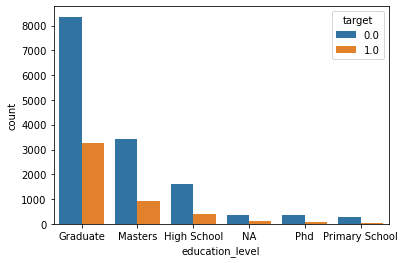

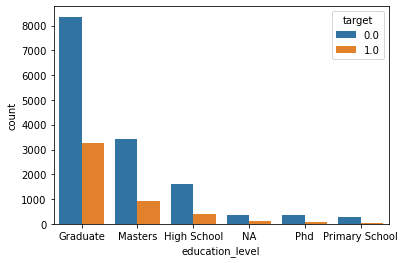

In [28]:
dfEducation3 = dfEducation[['education_level', 'target']]
sns.countplot(x = 'education_level', hue = 'target', data = dfEducation3)

In [29]:
catUni = dfEducation['enrolled_university'].unique() # check the categories of enrolled university 
catEd

array(['Graduate', 'Masters', 'High School', 'NA', 'Phd',
       'Primary School'], dtype=object)

array(['Graduate', 'Masters', 'High School', 'NA', 'Phd',
       'Primary School'], dtype=object)

In [30]:
enrolleduniversity = pd.crosstab(dfEducation['enrolled_university'], dfEducation['target'], rownames = ['enrolled_univerity'], colnames = ['target']).sort_values(by = 0, ascending = False) # pivot table to show the distribution of people enrolled in different types of university
enrolleduniversity

target,0.0,1.0
enrolled_univerity,,
no_enrollment,10896,2921
Full time course,2326,1431
Part time course,896,302
NA,263,123


target,0.0,1.0
enrolled_univerity,,
no_enrollment,10896,2921
Full time course,2326,1431
Part time course,896,302
NA,263,123


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

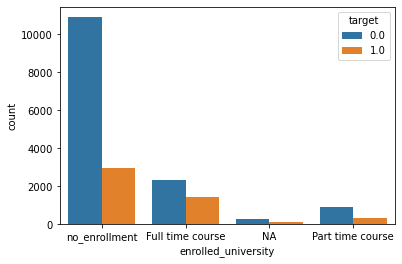

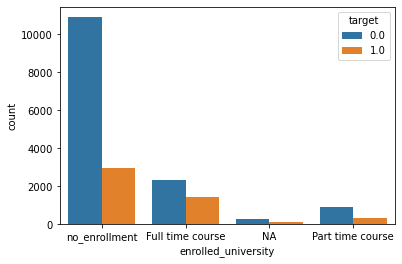

In [31]:
dfEducation4 = dfEducation[['enrolled_university', 'target']]
sns.countplot(x = 'enrolled_university', hue = 'target', data = dfEducation4)

#### 4. Gender & Major Discipline Columns

Clean up data by dropping duplicates

In [32]:
df.drop_duplicates(keep = False) # drop all the duplicates

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [33]:
df.isnull().sum(axis=0) # find null values in the dataframe

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [34]:
df1=df.fillna('Other') # Fill the nan values with 'Other'
df1

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Other,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,Other,Other,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,Other,Graduate,Business Degree,<1,Other,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Other,Other,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Other,Other,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Other,<1,500-999,Pvt Ltd,2,97,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Other,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,Other,Other,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,Other,Graduate,Business Degree,<1,Other,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Other,Other,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Other,Other,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Other,<1,500-999,Pvt Ltd,2,97,0.0


In [35]:
gendercol = df1['gender']
gender = gendercol.unique() # find out the types of gender in the 'gender' column
gender

array(['Male', 'Other', 'Female'], dtype=object)

array(['Male', 'Other', 'Female'], dtype=object)

In [36]:
ptableUni = pd.crosstab(dfEducation['major_discipline'], dfEducation['target'], rownames = ['major_discipline'], colnames = ['target']).sort_values(by = 0, ascending = False) # pivot table to show the distribution of people of various majors
ptableUni

target,0.0,1.0
major_discipline,,
STEM,10701,3791
NA,2264,549
Humanities,528,141
Other,279,102
Business Degree,241,86
Arts,200,53
No Major,168,55


target,0.0,1.0
major_discipline,,
STEM,10701,3791
NA,2264,549
Humanities,528,141
Other,279,102
Business Degree,241,86
Arts,200,53
No Major,168,55


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

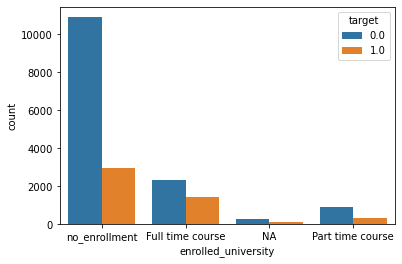

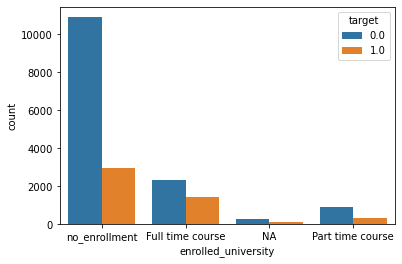

In [37]:
dfEducation2 = dfEducation[['enrolled_university', 'target']]
sns.countplot(x = 'enrolled_university', hue = 'target', data = dfEducation2)

Create Crosstabs for gender

In [38]:
gender= pd.crosstab(index = df['gender'], columns = 'count')# find the number of each type of gender in the gender column
gender

col_0,count
gender,
Female,1238
Male,13221
Other,191


col_0,count
gender,
Female,1238
Male,13221
Other,191


Create Crosstabs for major discipline

In [39]:
majorcol = df['major_discipline']
majorcol.unique()
major = pd.crosstab(index=df['major_discipline'], columns = 'count')#  find the number of each type of major_discipline in the major_discipline column
major

col_0,count
major_discipline,
Arts,253
Business Degree,327
Humanities,669
No Major,223
Other,381
STEM,14492


col_0,count
major_discipline,
Arts,253
Business Degree,327
Humanities,669
No Major,223
Other,381
STEM,14492


#### 5. Company Size & Company Type Columns

Read CSV data file

In [40]:
train_HR=pd.read_csv(r"C:\Users\linyi\Desktop\aug_train.csv")
train_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


Replace Missing Values

For the 'Company type' and 'Company size', set the missing values to 'Not Known'because the number of missing values for these two columns are significantly high. Therefore, we treat the category 'Not Known' as a category itself and do analysis on it given that we cannot ignore such a large number of rows.

In [41]:
#Replacing all the Nan values with 'Not Known' for Company Type
train_HR.company_type = train_HR.company_type.fillna('Not Known')
train_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Not Known,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Not Known,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,Not Known,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,Not Known,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Not Known,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Not Known,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,Not Known,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,Not Known,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [42]:
#Replacing all the Nan values with 'Not Known' for Company Size
train_HR.company_size = train_HR.company_size.fillna('Not Known')
train_HR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Not Known,Not Known,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,Not Known,Not Known,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,Not Known,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Not Known,Not Known,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Not Known,Not Known,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Not Known,Not Known,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,Not Known,Not Known,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,Not Known,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Not Known,Not Known,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Not Known,Not Known,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [43]:
train_HR.isnull().sum(axis=0) # To check the existence of null values

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size                 0
company_type                 0
last_new_job               423
training_hours               0
target                       0
dtype: int64

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size                 0
company_type                 0
last_new_job               423
training_hours               0
target                       0
dtype: int64

Identifying the unique values for company_type and company_size

In [44]:
train_companytype=train_HR['company_type'].unique()
train_companytype

array(['Not Known', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Other', 'Public Sector', 'NGO'], dtype=object)

array(['Not Known', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Other', 'Public Sector', 'NGO'], dtype=object)

In [45]:
train_companysize=train_HR['company_size'].unique()
train_companysize

array(['Not Known', '50-99', '<10', '10000+', '5000-9999', '1000-4999',
       '10/49', '100-500', '500-999'], dtype=object)

array(['Not Known', '50-99', '<10', '10000+', '5000-9999', '1000-4999',
       '10/49', '100-500', '500-999'], dtype=object)

Calculate frequency of each category, the proportion (percentage) of observations for each category and visualizing it.

In [46]:
company_type_count = train_HR['company_size'].value_counts(normalize=True)
company_type_count

Not Known    0.309949
50-99        0.160925
100-500      0.134200
10000+       0.105387
10/49        0.076783
1000-4999    0.069318
<10          0.068274
500-999      0.045777
5000-9999    0.029387
Name: company_size, dtype: float64

Not Known    0.309949
50-99        0.160925
100-500      0.134200
10000+       0.105387
10/49        0.076783
1000-4999    0.069318
<10          0.068274
500-999      0.045777
5000-9999    0.029387
Name: company_size, dtype: float64

In [47]:
company_type_frequency = train_HR['company_size'].value_counts()
company_type_frequency


Not Known    5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

Not Known    5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

#### 6. Last New Job & Training Hours Columns

Add columns into respective data frames 

In [48]:
#Last New Job from Column 11
df5 = pd.read_csv (r"C:\Users\linyi\Desktop\aug_train.csv", usecols= ['enrollee_id','last_new_job'])
df5

,enrollee_id,last_new_job
0,8949,1
1,29725,>4
2,11561,never
3,33241,never
4,666,4
...,...,...
19153,7386,1
19154,31398,4
19155,24576,4
19156,5756,2


,enrollee_id,last_new_job
0,8949,1
1,29725,>4
2,11561,never
3,33241,never
4,666,4
...,...,...
19153,7386,1
19154,31398,4
19155,24576,4
19156,5756,2


In [49]:
#Training Hours from Column 12
df6 = pd.read_csv (r"C:\Users\linyi\Desktop\aug_train.csv", usecols= ['enrollee_id','training_hours'])
df6

,enrollee_id,training_hours
0,8949,36
1,29725,47
2,11561,83
3,33241,52
4,666,8
...,...,...
19153,7386,42
19154,31398,52
19155,24576,44
19156,5756,97


,enrollee_id,training_hours
0,8949,36
1,29725,47
2,11561,83
3,33241,52
4,666,8
...,...,...
19153,7386,42
19154,31398,52
19155,24576,44
19156,5756,97


Replacing inaccurate values

In [50]:
#Change Never to 0
df5['last_new_job'].str.replace('never', '0', n=- 1, case=None, flags=0, regex=False)

0         1
1        >4
2         0
3         0
4         4
         ..
19153     1
19154     4
19155     4
19156     2
19157     1
Name: last_new_job, Length: 19158, dtype: object

0         1
1        >4
2         0
3         0
4         4
         ..
19153     1
19154     4
19155     4
19156     2
19157     1
Name: last_new_job, Length: 19158, dtype: object

Bin Training Hours Column

In [51]:
#Bin Training Hours Column 
interval_range = pd.interval_range(start=1, freq=50, end=336)
df6['cut_training_hours'] = pd.cut(df6['training_hours'], bins=interval_range, labels=[1,2,3,4,5,6,7])
df6.head()

,enrollee_id,training_hours,cut_training_hours
0,8949,36,"(1, 51]"
1,29725,47,"(1, 51]"
2,11561,83,"(51, 101]"
3,33241,52,"(51, 101]"
4,666,8,"(1, 51]"


,enrollee_id,training_hours,cut_training_hours
0,8949,36,"(1, 51]"
1,29725,47,"(1, 51]"
2,11561,83,"(51, 101]"
3,33241,52,"(51, 101]"
4,666,8,"(1, 51]"


### Data Analysis & Visualizations: 
Data Analysis is the process of inspecting, cleansing, transforming, and modelling data with the goal of discovering useful information, informing conclusions, and supporting decision-making. Data Visualization is a process of communicating your data in the form of a graphic representation. It basically describes your processes in an efficient, human-readable manner.

The following data visualizations includes tasks such as creating bar graphs for certain columns, creating histograms for other columns, and creating a scatter plot of one column(see data analysis section for more details). 

#### Create Histogram for City Development Index Column

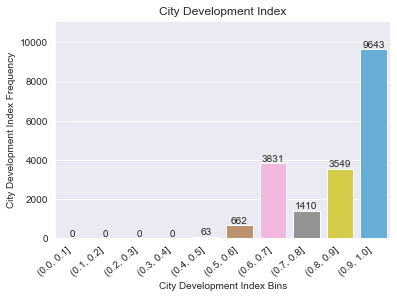

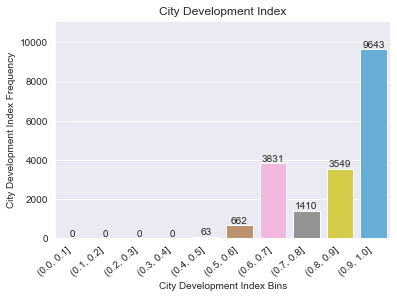

In [52]:
title = f'City Development Index'
sns.set_style('darkgrid')
barplot_city_index_bins = sns.barplot(x = bins1, y = bin_count_list, palette = 'colorblind') # x and y were determined in the processing stage of the city development index

barplot_city_index_bins.set_xticklabels(barplot_city_index_bins.get_xticklabels(), rotation=40, ha="right")# the bins are formatted and rotated to be visually appealing and not overlapping 
# the 4 lines of code below name the x and y axis and displays the data at the top of each bar
barplot_city_index_bins.set_title(title)
barplot_city_index_bins.set_xlabel('City Development Index Bins')
barplot_city_index_bins.set_ylabel('City Development Index Frequency')
barplot_city_index_bins.set_ylim(top=max(bin_count_list) * 1.15)
# This for loop  purpose is to iterate through the lists created in the processing stage, both lists are of equal length therefore match correctly to each value in the corrosponding list 
# The text, numbers, and bins are formatted to visually appeal to the reader
for bar, bin_count_list in zip(barplot_city_index_bins.patches,bin_count_list):
    text_city_index_bins = bar.get_x() + bar.get_width() / 2.0
    text_city_index_bins_count = bar.get_height()
    text = f'{bin_count_list}'
    barplot_city_index_bins.text(text_city_index_bins, text_city_index_bins_count, text, ha='center', va='bottom')

#### Create Bar Graph for Relevant Experience Column

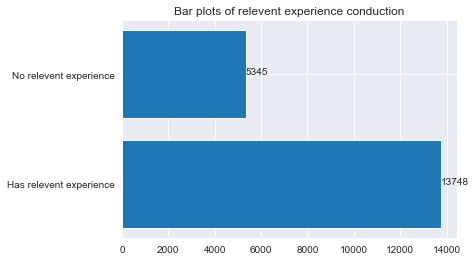

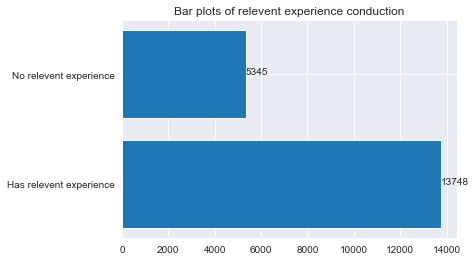

In [53]:
object=('Has relevent experience','No relevent experience')# name of the columns
value=[13748,5345] #number of values
width=0.5
plt.barh(object,value)# plot bar graph
for index, num in enumerate(value):  # add number labels to the bar plot
    plt.text(num, index,str(num))
plt.title("Bar plots of relevent experience conduction")
plt.show()

#### Create Pie Chart for Experience Column

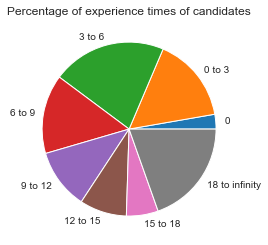

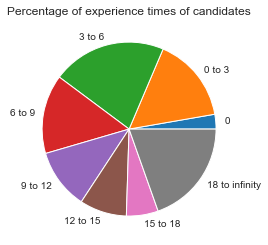

In [54]:
labels=['0','0 to 3','3 to 6','6 to 9','9 to 12','12 to 15','15 to 18','18 to infinity'] # creating categories for experience
plt.pie(df3,labels=labels) # draw pie chart
plt.title("Percentage of experience times of candidates")
plt.show()

#### Calculate Percentage of Job Change Rate for Relevant Experience Column

Use groupby to calculate the percentage of job change rate in column 'relevent_experience'

In [55]:
jcrelexperiencepercent=df1.groupby("relevent_experience")["target"].mean() #the percentage of job change rate of elements in column 'relevent_experience'
jcrelexperiencepercent

relevent_experience
Has relevent experience    0.214690
No relevent experience     0.338427
Name: target, dtype: float64

relevent_experience
Has relevent experience    0.214690
No relevent experience     0.338427
Name: target, dtype: float64

#### Calculate Percentage of Job Change Rate for Experience Column

Use groupby to calculate the percentage of job change rate in column 'experience'

In [56]:
jcexperiencepercent=df1.groupby("experience")["target"].mean().sort_values(ascending=False) # the percentage of job change rate of elements in column 'experience'
jcexperiencepercent

experience
<1       0.454023
1        0.424408
Other    0.353846
3        0.353028
2        0.331854
4        0.325731
7        0.294747
5        0.288112
6        0.282072
8        0.243142
11       0.227410
20       0.222973
9        0.217347
10       0.210152
13       0.192982
12       0.186235
14       0.182594
19       0.174342
17       0.166667
15       0.166181
18       0.153571
>20      0.153074
16       0.141732
Name: target, dtype: float64

experience
<1       0.454023
1        0.424408
Other    0.353846
3        0.353028
2        0.331854
4        0.325731
7        0.294747
5        0.288112
6        0.282072
8        0.243142
11       0.227410
20       0.222973
9        0.217347
10       0.210152
13       0.192982
12       0.186235
14       0.182594
19       0.174342
17       0.166667
15       0.166181
18       0.153571
>20      0.153074
16       0.141732
Name: target, dtype: float64

Use groupby to calculate the percentage of job change rate in column 'education_level'

In [57]:
df1.groupby("education_level")['target'].mean().sort_values() # the percentage of job change rate of elements in column 'education_level'

education_level
Primary School    0.133117
Phd               0.140097
High School       0.195340
Masters           0.214400
Other             0.226087
Graduate          0.279790
Name: target, dtype: float64

education_level
Primary School    0.133117
Phd               0.140097
High School       0.195340
Masters           0.214400
Other             0.226087
Graduate          0.279790
Name: target, dtype: float64

Create Bar Graphs for Education Level Columns¶

<AxesSubplot:xlabel='education_level', ylabel='count'>

<AxesSubplot:xlabel='education_level', ylabel='count'>

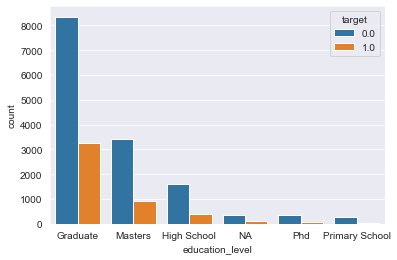

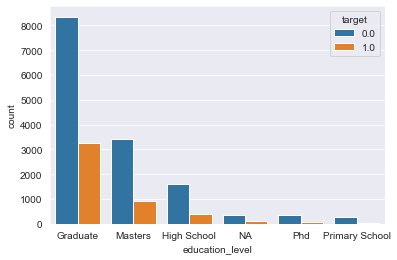

In [58]:
dfEducation3 = dfEducation[['education_level', 'target']] 
sns.countplot(x = 'education_level', hue = 'target', data = dfEducation3) # Create a bar graph which specifies the target variable for every category of education level

#### Calculate Percentage of Job Change Rate for Enrolled University Column

Use groupby to calculate the percentage of job change rate in column 'enrolled_university'



In [59]:
df1.groupby("enrolled_university")['target'].mean().sort_values() # the percentage of job change rate of elements in column 'enrolled_university'

enrolled_university
no_enrollment       0.211406
Part time course    0.252087
Other               0.318653
Full time course    0.380889
Name: target, dtype: float64

enrolled_university
no_enrollment       0.211406
Part time course    0.252087
Other               0.318653
Full time course    0.380889
Name: target, dtype: float64

#### Create Bar Graphs for Enrolled University


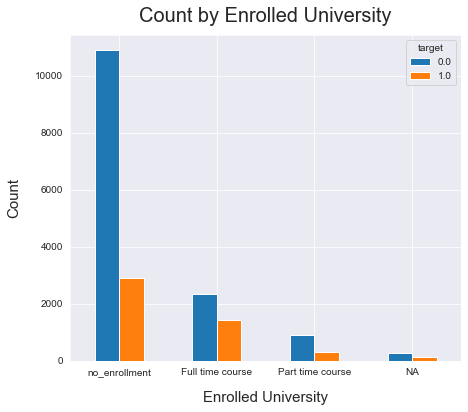

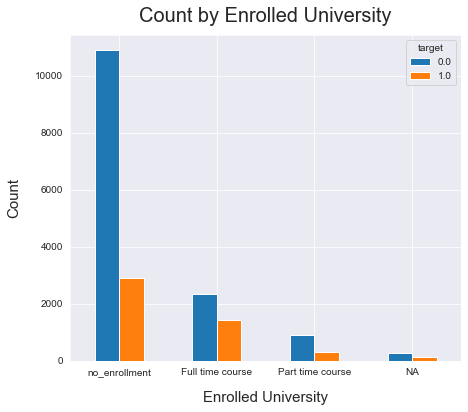

In [60]:
enrolleduniversity.plot(kind='bar', figsize = (7,6), rot = 0);
plt.xlabel('Enrolled University', labelpad = 14,fontsize=15)
plt.ylabel('Count', labelpad = 14,fontsize=15)
plt.title("Count by Enrolled University", y=1.02, fontsize=20);

#### Create Bar Graphs for Gender & Major Discipline Columns

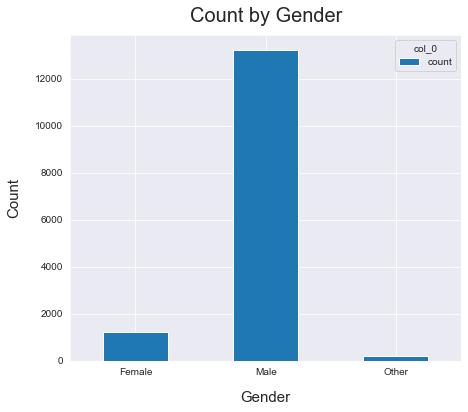

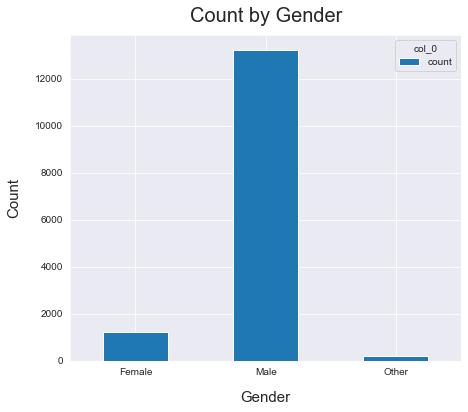

In [61]:
gender.plot(kind='bar', figsize = (7,6), rot = 0);
plt.xlabel('Gender', labelpad = 14,fontsize=15)
plt.ylabel('Count', labelpad = 14,fontsize=15)
plt.title("Count by Gender", y=1.02, fontsize=20);

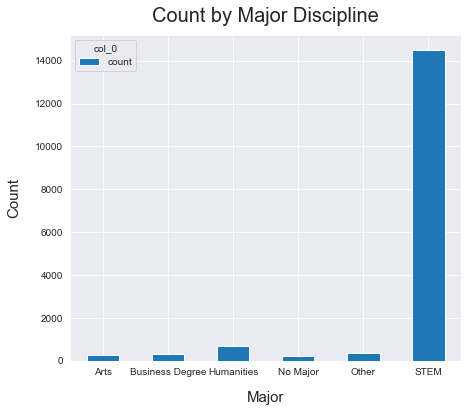

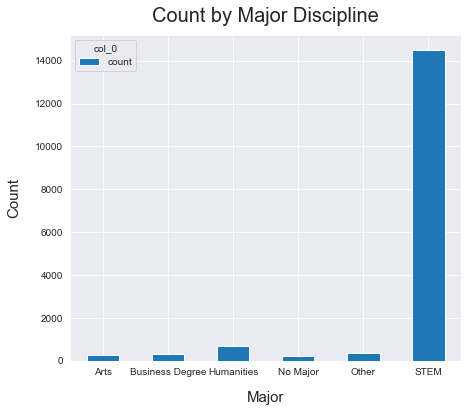

In [62]:
major.plot(kind='bar', figsize = (7,6), rot = 0);
plt.xlabel('Major', labelpad = 14,fontsize=15)
plt.ylabel('Count', labelpad = 14,fontsize=15)
plt.title("Count by Major Discipline", y=1.02, fontsize=20);

#### Create Bar Graphs for Company Size & Company Type Columns

Create a Pie chart using the above variables for company_size that is the employee strength

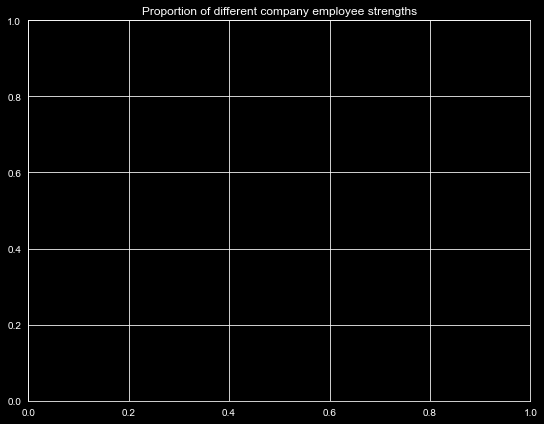

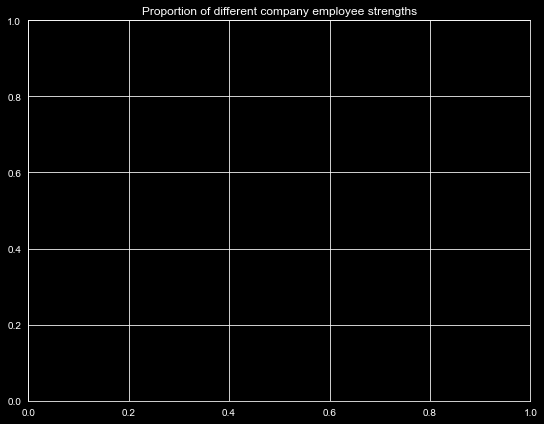

In [63]:
#Plotting a pie chart
#Importing the warnings to supress the deprecation warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
plt.style.use('dark_background')
#Setting the size of the Pie chart
plt.figure(figsize=[9,7])

#Setting the title
plt.title("Proportion of different company employee strengths")

#Plotting the pie chart
train_HR['company_size'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%', textprops={'color':"b"})
plt.axes().set_ylabel('')
plt.show()

Looking at the above Pie chart, one can say that it would not be a good idea to completely ignore the missing values given that it constitutes 31% of the total number of data.

The maximum number of data what we have is for a organization which typical an employee strength of 50-99.

Plotting the Bar chart using the above variables for company_type that is the type that the company falls into.

In [64]:
company_type_count = train_HR['company_type'].value_counts(normalize=True)
company_type_frequency = train_HR['company_type'].value_counts()

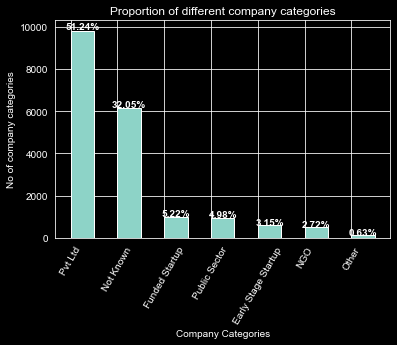

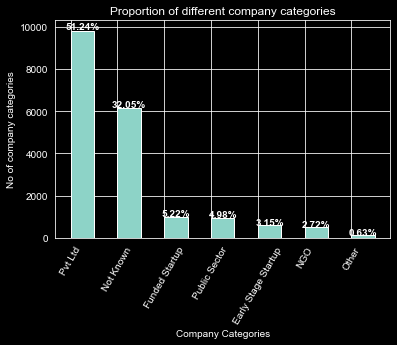

In [65]:
import matplotlib.pyplot as plt

#calculating different values for the bar chart
categories = company_type_count.index
frequencies = company_type_frequency.values
proportions = company_type_count.values * 100

#changing the backgroung to black
plt.style.use('dark_background')

#using the matplotlib to plot the bar chart
bar_chart = plt.bar(categories, frequencies, align='edge', width=0.5)

#defining the labels
plt.xlabel("Company Categories")
plt.ylabel("No of company categories")
plt.title("Proportion of different company categories")

#Declutting the x-axis labels
plt.tick_params(axis='x', rotation=60)

#Displaying the percentage on the graph
i = 0
for p in bar_chart:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str("{:.2f}".format(proportions[i]))+'%', ha='center', weight='bold')
    i+=1
plt.show()


Looking at the above Bar chart, it is evident that 51.24% of the comapny_type that is company category data is rules by Private Limited organizations.

The maximum number of data what we have is for a organization which typical an employee strength of 50-99.

#### Calculate Percentage of Job Change Rate for Company Type Column

Use groupby to calculate the percentage of job change rate in column 'company_type'

In [66]:
df1.groupby("company_type")['target'].mean().sort_values() # the percentage of job change rate of elements in column 'company_type'

company_type
Funded Startup         0.139860
Pvt Ltd                0.180809
NGO                    0.186180
Public Sector          0.219895
Early Stage Startup    0.235489
Other                  0.385402
Name: target, dtype: float64

company_type
Funded Startup         0.139860
Pvt Ltd                0.180809
NGO                    0.186180
Public Sector          0.219895
Early Stage Startup    0.235489
Other                  0.385402
Name: target, dtype: float64

#### Analysis #1: Create Scatterplot With Top 10 Cities and Job Target

The scatterplot below is analyzing employees that are looking for a job change and those who aren't, against the city development index. The city id is used for the purpose of showing cities which have a high development index in general rather than an actual city name. The scatterplot demonstrates that employees located in high developed cities are not looking for a job change. As the index decreases there seems to be an increase in employees which are looking for a job change. The cities which are highly devloped will tend to have a larger amount of opportunity and therefore employees who are already there won't feel the need to look for a job change. This proves problematic for companies in cities with low indexes leading to lower retention rates.

In [67]:
top_10_cities = list(aug_traindf['city'].value_counts().head(10).index) # this creates a list of the cities which had the most employees for the scatterplot visualization
new_aug_traindf = aug_traindf.loc[aug_traindf['city'].isin(top_10_cities)] # this dataframe contains the top 10 cities with the most employees for the purpose of visualization below


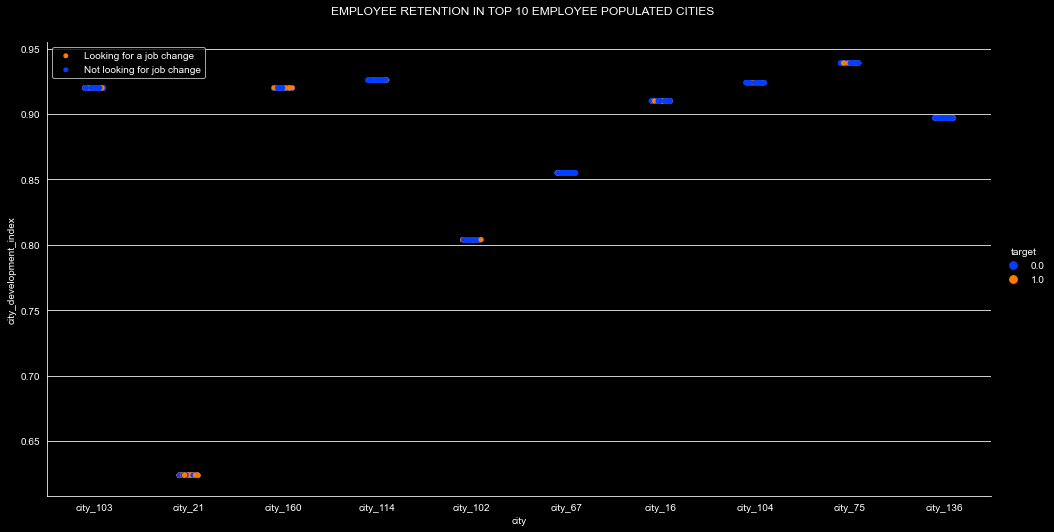

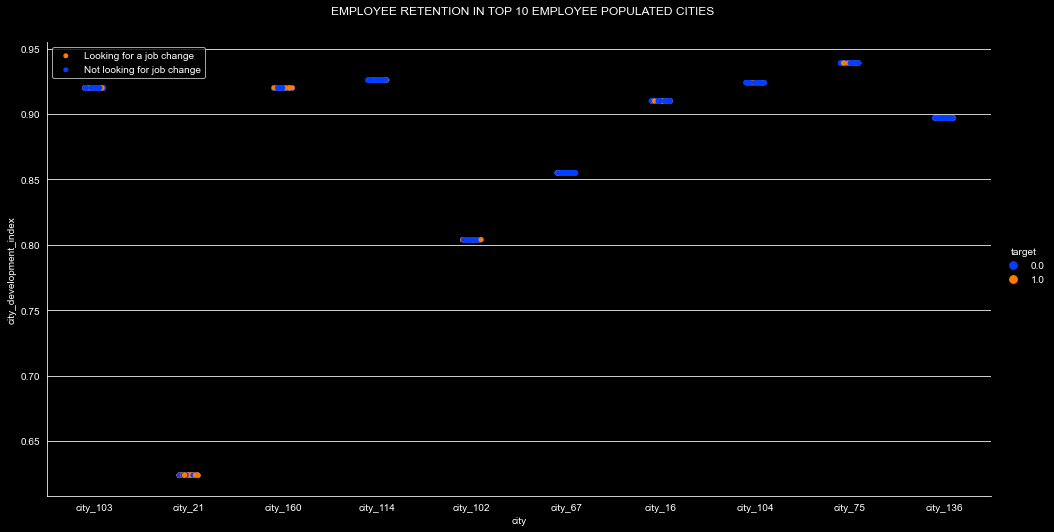

In [68]:
scatter_city_devlopment_index = sns.catplot(x = 'city', y = 'city_development_index', aspect = 2 , height = 7, data=new_aug_traindf, hue='target', palette = 'bright')# specifies the paramters of the scatterplot and formats it as well
scatter_city_devlopment_index.fig.suptitle('EMPLOYEE RETENTION IN TOP 10 EMPLOYEE POPULATED CITIES', y = 1.05) # creates a title that is not overlapping with the scatterplot
plt.legend(labels=["Looking for a job change", 'Not looking for job change']) # to make clear what each color represents a legend is created to state the name of what the color repsresents as opposed to a number giving no context

It seems that a higher city development index causes a lower job changing rate from the picture above. However, many columns are not all fully formed by numbers, so we need to do data processing for the columns in train dataset and test dataset in order to find which factor affect the job changing rate the most.

#### Prediction Models

In [69]:
le = LabelEncoder() 
LGBM = lgbm.LGBMClassifier()

In [70]:
sns.set(rc = {'figure.figsize':(12,6)}) #Setting the default figure size 

In [71]:
#Read files from csv files 
dfTrain = pd.read_csv(r"C:\Users\linyi\Desktop\aug_train.csv")
dfTest = pd.read_csv(r"C:\Users\linyi\Desktop\aug_test.csv")

In [72]:
dfTrain.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#### Data Cleaning & Processing for Model Prediction

We drop the column 'enrollee_id','city' because it serves no purpose

In [73]:
dfTrain = dfTrain.drop(['enrollee_id', 'city'], axis = 1) # drop the columns of enrollee_id and city as they are not useful numeric values for model training
dfTest = dfTest.drop(['enrollee_id', 'city'], axis = 1)

We observe that all the missing values are present in the columns which contain categorical data. Hence, we replace it with the most frequent observation, i.e. Mode.

In [74]:
for column in dfTrain.columns:
    dfTrain[column] = dfTrain[column].transform(lambda x: x.fillna(x.mode()[0]))#fill the nan in the training dataset with 0

In [75]:
for column in dfTest.columns:
    dfTest[column] = dfTest[column].transform(lambda x: x.fillna(x.mode()[0]))# fill the nan in the test dataset with 0

All null values are imputed now

##### Data Processing of the Variables

We convert the categorical variables in a format that will be used in our ML models. We map the ordinal variables according to their weight. We transform the nominal variables using the 'LabelEncoder' function to values between 0 and 'n-1'.

In [76]:
dfTrain["gender"] = [ 1 if gender == "Female" else 0 if gender == "Male" else 2 for gender in dfTrain["gender"]] #Female: 1, Male: 0, else: 2
dfTest["gender"] = [ 1 if gender == "Female" else 0 if gender == "Male" else 2 for gender in dfTest["gender"]] 

In [77]:
relExpMap = {'No relevent experience': 0, 'Has relevent experience': 1}

dfTrain['relevent_experience'] = dfTrain['relevent_experience'].map(relExpMap)
dfTest['relevent_experience'] = dfTest['relevent_experience'].map(relExpMap)   

In [78]:
enUniMap = {'no_enrollment': 0, 'Part time course': 1, 'Full time course': 2}

dfTrain['enrolled_university'] = dfTrain['enrolled_university'].map(enUniMap)
dfTest['enrolled_university'] = dfTest['enrolled_university'].map(enUniMap)   

In [79]:
edLevelMap = {'Primary School': 0, 'High School': 1, 'Graduate': 2, 'Masters': 3, 'Phd': 4}

dfTrain['education_level'] = dfTrain['education_level'].map(edLevelMap)
dfTest['education_level'] = dfTest['education_level'].map(edLevelMap)  

In [80]:
dfTrain['major_discipline'] = le.fit_transform(dfTrain['major_discipline'])
dfTest['major_discipline'] = le.fit_transform(dfTest['major_discipline'])

In [81]:
dfTrain['experience'].replace({'>20' : '21', '<1' : '0'}, inplace = True)
dfTest['experience'].replace({'>20' : '21', '<1' : '0'}, inplace = True)

In [82]:
dfTrain['experience'] = dfTrain['experience'].astype(int)
dfTest['experience'] = dfTest['experience'].astype(int)

In [83]:
compSizeMap = {'<10': 1, 'Oct-49': 2, '50-99': 3, '100-500': 4, '500-999': 5, '1000-4999': 6, '5000-9999': 7, '10000+': 8}

dfTrain['company_size'] = dfTrain['company_size'].map(compSizeMap)
dfTest['company_size'] = dfTest['company_size'].map(compSizeMap)   

In [84]:
dfTrain['company_size'].fillna(8,inplace=True)
dfTest['company_size'].fillna(8,inplace=True)

In [85]:
dfTrain.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [86]:
dfTrain['company_type'] = le.fit_transform(dfTrain['company_type'])
dfTest['company_type'] = le.fit_transform(dfTest['company_type'])

In [87]:
dfTrain['last_new_job'].replace({'>4' : '5', 'never' : '0'}, inplace = True)
dfTest['last_new_job'].replace({'>4' : '5', 'never' : '0'}, inplace = True)

In [88]:
dfTrain['last_new_job'] = dfTrain['last_new_job'].astype(int)
dfTest['last_new_job'] = dfTest['last_new_job'].astype(int)

In [89]:
dfTrain.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

##### Analysis 2: Feature Correlation with the Target Variable
1. The factor that affects the job changing rate most will be decided by the correlation of the factors with target.
2. Higher the absolute value of correlation means that the factor affects the job changing rate more.

[Text(0.5, 0, 'target')]

[Text(0.5, 0, 'target')]

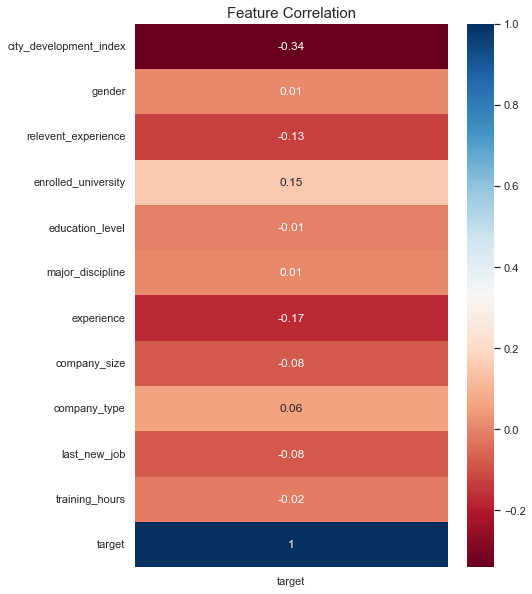

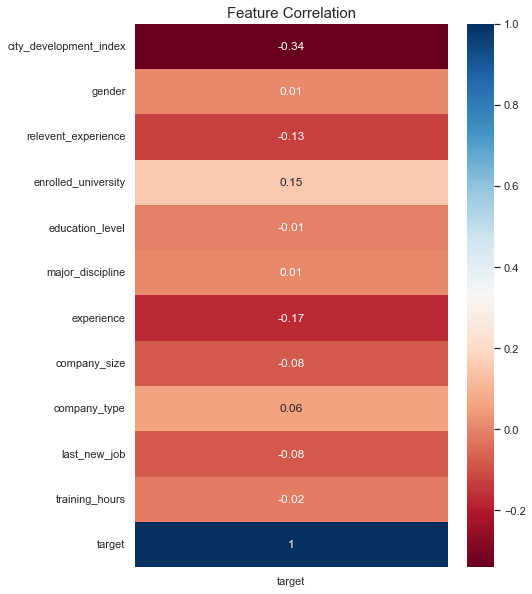

In [90]:
fig,ax=plt.subplots(figsize=(7,10))
sns.heatmap(dfTrain.corr().iloc[-1,:].values.reshape(-1,1).round(2),annot=True,cmap="RdBu")# find the correlations of other columns with target
plt.title('Feature Correlation',fontsize=15)
ax.set_yticklabels(dfTrain.columns.tolist(),rotation=0)
ax.set_xticklabels(['target'])


1. We see that the city_development_index has the highest influence on the job rate, meaning the more negatively correlated the target variable with the city_development_index, the more retention takes place, meaning cities with higher index have a better rate of retention.
2. This id followed by experience and relevent experience, all of them are negatively correlated to job changing possibilities.

###### Model Training (Includes Analyses 3-6)

We train 5 models:
1. Decision Tree
2. Random Forest
3. LGBM
4. Logistic Regression
5. KNN 

We select the one which has the best performance to predict the job changing circumstance of the test data.

In [91]:
y = dfTrain['target']
X = dfTrain.drop(['target'], axis=1) # the columns other than target column

In [92]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state=100, stratify = y) # use 25% of the data as the test-size of training model

In [93]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((14368, 11), (14368,), (4790, 11), (4790,))

((14368, 11), (14368,), (4790, 11), (4790,))

Analysis3:Decision Tree 

In [94]:
decisionTree = DecisionTreeClassifier(criterion='gini', random_state = 75 , max_depth = 3, class_weight = 'balanced', min_samples_leaf = 5)# use decisionTreeclassifier
decisionTree.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=75)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=75)

In [95]:
decisionTreePred = decisionTree.predict(X_val)# predict the result by decisionTree model
accuracy_score(y_val, decisionTreePred)


0.5947807933194155

0.5947807933194155

It seems the accuracy_score is not high enough.We tune the parameters and use GridSearch to increase the accuracy of the model

In [96]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 75, class_weight = 'balanced')

parameter = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf' : [2, 3, 4, 5, 6, 7, 8, 9, 10]}

decisionTreeGSCV = GridSearchCV(model, cv = 5, param_grid = parameter, n_jobs = -1)#use grid search to find the optimum parameter

decisionTreeGSCV.fit(X_train, y_train)
print('Most optimum parameters for the model:- \n', decisionTreeGSCV.best_params_)

Most optimum parameters for the model:- 
 {'max_depth': 2, 'min_samples_leaf': 8}
Most optimum parameters for the model:- 
 {'max_depth': 2, 'min_samples_leaf': 8}


In [97]:
decisionTree = DecisionTreeClassifier(criterion='gini', random_state = 75 , max_depth = 2, class_weight = 'balanced', min_samples_leaf = 8)
decisionTree.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=8,
                       random_state=75)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=8,
                       random_state=75)

In [98]:
decisionTreePred = decisionTree.predict(X_val)# predict the result by decisionTree model
accuracy_score(y_val, decisionTreePred)

0.7789144050104384

0.7789144050104384

Analysis 4:Random Forests

In [99]:
randomForest = RandomForestClassifier(criterion='gini', random_state = 75, max_depth = 8, class_weight = 'balanced', min_samples_leaf = 4, n_estimators = 10)# use randomForest classifier
randomForest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       n_estimators=10, random_state=75)

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       n_estimators=10, random_state=75)

In [100]:
model = RandomForestClassifier(criterion = 'gini', random_state = 75, class_weight = 'balanced')

parameter = {'min_samples_leaf' : [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators' : [5, 10, 20]}

randomforestGSCV = GridSearchCV(model, cv = 10, param_grid = parameter, n_jobs = -1)#use grid search to find the optimum parameter

randomforestGSCV.fit(X_train, y_train)
print('Most optimum parameters for the model:- \n', decisionTreeGSCV.best_params_)

Most optimum parameters for the model:- 
 {'max_depth': 2, 'min_samples_leaf': 8}
Most optimum parameters for the model:- 
 {'max_depth': 2, 'min_samples_leaf': 8}


In [101]:
randomForest = RandomForestClassifier(criterion='gini', random_state = 75, class_weight = 'balanced', min_samples_leaf = 2, n_estimators = 20)
randomForest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=20, random_state=75)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=20, random_state=75)

In [102]:
randomForestPred = randomForest.predict(X_val) #predict the result by randomforest model
accuracy_score(y_val, randomForestPred)

0.7626304801670146

0.7626304801670146

Analysis 5:Lightgbm classifier

In [103]:
LGBM = lgbm.LGBMClassifier()# Use LGBM classifier
LGBM.fit(X_train, y_train)#fit the models

LGBMClassifier()

LGBMClassifier()

In [104]:
LGBMpred=LGBM.predict(X_val)# predict the models by LGBM
accuracy_score(y_val, LGBMpred)

0.7734864300626305

0.7734864300626305

 Logistic regression(supplement model)

In [105]:
logregression = LogisticRegression(solver='liblinear')# Use LogisticRegression()
logregression.fit(X_train, y_train)
predictions = logregression.predict(X_val)#predict the models by logistic regression
accuracy_score(predictions, y_val)

0.7622129436325679

0.7622129436325679

KNN (supplement model)

In [106]:
kNN = KNeighborsClassifier(n_neighbors=5)# Use KNN classifier
kNN.fit(X_train, y_train)
predictions1 = kNN.predict(X_val)# predict the models by KNN
accuracy_score(y_val, predictions1)

0.7141962421711899

0.7141962421711899

We form a dataframe based on the accuracy_score of 5 models

In [107]:
data = {'models':['Decision Tree','Random Forest','LGBM','Logistic Regression','KNN'],'accuracy_score':[0.7789, 0.7626, 0.7735, 0.7622, 0.7142]}# construct the dataframe with models and their accuracy_score
pd.DataFrame(data)

,models,accuracy_score
0,Decision Tree,0.7789
1,Random Forest,0.7626
2,LGBM,0.7735
3,Logistic Regression,0.7622
4,KNN,0.7142


,models,accuracy_score
0,Decision Tree,0.7789
1,Random Forest,0.7626
2,LGBM,0.7735
3,Logistic Regression,0.7622
4,KNN,0.7142


Analysis 6: Prediction of job changing with the best model

We found that the accuracy score of decisionTree is highest, so use the decisionTree model to predict the 'target' column of dfTest

In [108]:
predictdata=decisionTree.predict(dfTest)
predictdata=pd.DataFrame(predictdata)
predictdata.rename(columns={0:'target'})
predictdata
#the result of the target column of dfTest is predicted 

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2124,0.0
2125,0.0
2126,0.0
2127,0.0


,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2124,0.0
2125,0.0
2126,0.0
2127,0.0


In [109]:
predictdata.value_counts()# conduct the number of 0 and 1, 0 means job retention,1 means job change

0.0    1728
1.0     401
dtype: int64

0.0    1728
1.0     401
dtype: int64

In [110]:
numofretention=1728
percentageofretention=numofretention/len(predictdata)
percentageofretention # The percentage of job retentation is nearly 81%

0.8116486613433537

0.8116486613433537

We may see that the people that doesn't have job change occupys nearly 81%, the decision tree model predicts the result well 
